# Predicting Clinical Trial Terminations
### Notebook 3.1: Additional Text Preprocessing

**Author: Clement Chan**

---
Notes on the notebook:
- ADD NOTES HERE!!

### Data Dictionary for this notebook that is based on clinicaltrials.gov:

---

| Column | Description                                  |Data Type|
|-------|--------------------------------------------|-------|
| Study Title | Title of the Clinical Trial           | object |
| Study Status | Binary column, 0 for Completed Trials and 1 for Terminated Trials | int |
| Brief Summary | Short description of the clinical study (Includes study hypothesis) | object |
| Study Results | Whether the results are posted (yes = 1 or no = 0) | int|
| Conditions | Primary Disease or Condition being studied     | object |
| Interventions | The methods used in the trial to reach the outcome                 | object |
| Primary Outcome Measures | Description of specific primary outcome | object |
| Secondary Outcome Measures | Description of specific secondary outcome | object |
| Sponsor | The corporation or agency that initiates the study | object |
| Collaborators | Other organizations that provide support | object |
| Sex | All: No limit on eligibility based on sex, Male: Only male participants, Female: Only female participants | int |
| Age | Age group of participants: ADULT, OLDER_ADULT, CHILD  | int |
| Phases | Clinical trial phase of the study | int |
| Enrollment | Total number of participants in a study | int |
| Funder Type | Government, Industry, or Other | int |
| Study Type | Interventional = 1, Observational = 0 | int |
| Study Design | Study design based on study type | object |
| Study Duration | Length of the entire study in categories | object |
| Locations | Where the clinical study will be held | object |

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# dividing the data
from sklearn.model_selection import train_test_split

# scalars
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Text data extraction
from sklearn.feature_extraction.text import CountVectorizer

# classifiers
from sklearn.linear_model import LogisticRegression

# model metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score, RocCurveDisplay

# ignores the filter warnings
import warnings
warnings.filterwarnings('ignore')

<a id = 'table'><a/>
## Table of Contents

---
1. [Text Preprocessing](#text)


**Prepare the dataset** from the train and test CSV files

In [2]:
# training set
train_df = pd.read_csv('train_set.csv', index_col=0)
train_df.head()

,Study Results,Study Type,Sex_ALL,Sex_FEMALE,Sex_MALE,Age_ADULT,Age_CHILD,Age_OLDER_ADULT,Phases_EARLY_PHASE1,Phases_NO PHASE,...,Summary_volunteers,Summary_vs,Summary_way,Summary_ways,Summary_weight,Summary_work,Summary_works,Summary_year,Summary_young,Study Status
0,0,1,1,0,0,0,0,1,0,1,...,2,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0


In [3]:
# testing set
test_df = pd.read_csv('test_set.csv', index_col=0)
test_df.head()

,Study Results,Study Type,Sex_ALL,Sex_FEMALE,Sex_MALE,Age_ADULT,Age_CHILD,Age_OLDER_ADULT,Phases_EARLY_PHASE1,Phases_NO PHASE,...,Summary_volunteers,Summary_vs,Summary_way,Summary_ways,Summary_weight,Summary_work,Summary_works,Summary_year,Summary_young,Study Status
0,1,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [9]:
# shape of train and test
print(f'Training shape: {train_df.shape}, Test shape: {test_df.shape}')

Training shape: (244088, 978), Test shape: (61022, 978)


Now we need to slice out the independant and dependant variables.

In [4]:
# training set
X_train = train_df.iloc[:,:977]
y_train = train_df.iloc[:, -1]

# sanity check
print(X_train.shape, y_train.shape)

(244088, 977) (244088,)


In [5]:
# testing set
X_test = test_df.iloc[:,:977]
y_test = test_df.iloc[:, -1]

# sanity check
print(X_test.shape, y_test.shape)

(61022, 977) (61022,)


We also need to load our main text dataframe!

In [6]:
# Getting our text data
text_df = pd.read_csv('clean_ctg.csv', index_col = 0)
text_df.head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Locations,study_duration
0,Effectiveness of a Problem-solving Interventio...,0,We will conduct a two-arm individually randomi...,0,"Mental Health Issue (E.G., Depression, Psychos...",behavioral: pride 'step 1' problem-solving int...,"Mental health symptoms, The Strengths and Diff...","Mental health symptoms, The adolescent-reporte...",Sangath,Harvard Medical School (HMS and HSDM)|London S...,ALL,"CHILD, ADULT",NO PHASE,210-490,OTHER,1,Allocation: RANDOMIZED|Intervention Model: PAR...,"Sangath, New Delhi, Delhi, 110016, India",123-244
1,Investigating the Effect of a Prenatal Family ...,0,The purpose of this study is to measure the di...,0,Focus: Contraceptive Counseling|Focus: Postpar...,other: family planning counseling let by commu...,"Self-reported contraceptive use, 6 months post...","Intent to use contraception in the future, 6 m...",Planned Parenthood League of Massachusetts,Society for Family Planning Research Fund,FEMALE,"CHILD, ADULT, OLDER_ADULT",NO PHASE,120-209,OTHER,1,Allocation: NON_RANDOMIZED|Intervention Model:...,Palestinian Ministry of Health Maternal Child ...,366-515
2,Pre-exposure Prophylaxis (PrEP) for People Who...,1,People who inject drugs (PWID) experience high...,0,Intravenous Drug Abuse,behavioral: prep uptake/adherence intervention...,"PrEP uptake by self-report, measured using 1 i...",Participant satisfaction with intervention con...,Boston University,National Institute on Drug Abuse (NIDA),ALL,"ADULT, OLDER_ADULT",NO PHASE,0-8,OTHER,1,Allocation: RANDOMIZED|Intervention Model: PAR...,unknown,245-365
3,Tailored Inhibitory Control Training to Revers...,0,Insufficient inhibitory control is one pathway...,0,Smoking|Alcohol Drinking|Prescription Drug Abu...,behavioral: person-centered inhibitory control...,"Inhibitory control performance, Task 1, Perfor...",Far transfer to a task related to inhibitory c...,University of Oregon,none,ALL,ADULT,NO PHASE,80-119,OTHER,1,Allocation: RANDOMIZED|Intervention Model: PAR...,"University of Oregon, Social and Affective Neu...",516-671
4,Neuromodulation of Trauma Memories in PTSD & A...,0,The purpose of this study is to examine the ef...,1,Alcohol Dependence|PTSD,drug: propranolol|drug: placebo,"Retrieval Session Distress Scores (Session 1),...","Proportion of Drinking Days, Proportion of dri...",Medical University of South Carolina,National Institute on Alcohol Abuse and Alcoho...,ALL,"ADULT, OLDER_ADULT",PHASE2,42-59,OTHER,1,Allocation: RANDOMIZED|Intervention Model: PAR...,"MUSC, Charleston, South Carolina, 294258908, U...",862-1097


<a id = 'text'></a>
## 1. Text Preprocessing

[back to table of contents](#table)

---

We have some more important features to add to the model including the `Sponsor`, `Collaborators`, `Conditions`, and `Primary Outcome Measures` text columns which would require further preprocessing.

### Sponsor

- The `Sponsor` column consists of the main company that sponsors the clinical trial.
- We will use the **Bag of Words** vectorizer which will look at the token frequency per document.

In [7]:
# Setting variables
X_sponsor = text_df['Sponsor']
y = text_df['Study Status']

In [8]:
# Splitting summary dataset
sponsor_train, sponsor_test, y_train, y_test = train_test_split(X_sponsor, y, test_size=0.2, random_state=12, stratify=y)

# check the shape
print(sponsor_train.shape, sponsor_test.shape, y_train.shape, y_test.shape)

(244088,) (61022,) (244088,) (61022,)


We will instantiate a **CountVectorizer()** with the following features:
- Remove stop_words such as 'the', 'is', 'he', 'them', etc.
- Setting a lower max_feature of 250 since there are less words in company names.
- Set ngram_range from 1 to 2 so we can look at words in sequence.

In [9]:
# Instantiate count vectorizer
bow = CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=250)

# Fit the vector
bow.fit(sponsor_train)

# transform the train and test set
sponsor_train_transform = bow.transform(sponsor_train)
sponsor_test_transform = bow.transform(sponsor_test)

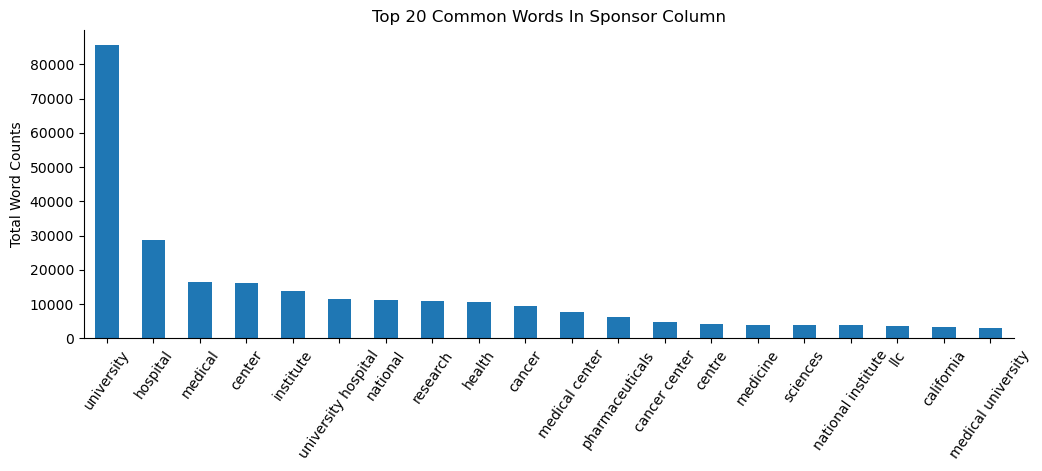

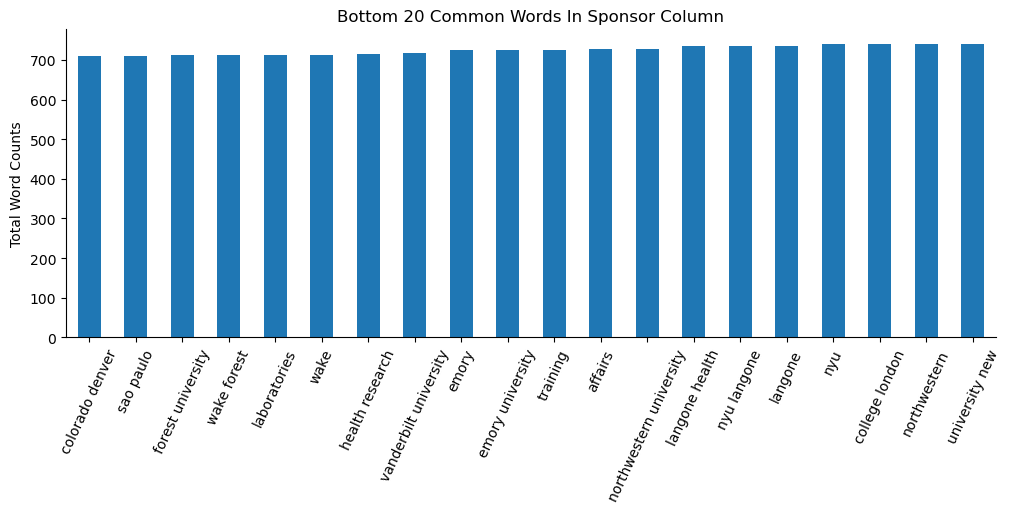

In [10]:
# first plot
top_counts = pd.DataFrame(
    {"counts": sponsor_train_transform.toarray().sum(axis=0)},
    index=bow.get_feature_names_out()
).sort_values("counts", ascending=False)

top_counts.head(20).plot(kind="bar", legend=False, figsize=(12,4))
plt.title("Top 20 Common Words in Sponsor column".title())
plt.ylabel("Total Word Counts")
plt.xticks(rotation=55)
sns.despine()
plt.show()



# second plot
bottom_counts = pd.DataFrame(
    {"counts": sponsor_train_transform.toarray().sum(axis=0)},
    index=bow.get_feature_names_out()
).sort_values("counts", ascending=True)

bottom_counts.head(20).plot(kind="bar", legend=False, figsize=(12,4))
plt.title("Bottom 20 common words in Sponsor column".title())
plt.ylabel("Total Word Counts")
plt.xticks(rotation=65)
sns.despine()
plt.show()

Interesting to see that most clinical trials are sponsored by universities, hospitals, and then national institute of health.

In [10]:
# Add prefix Sponsor_
sponsor_col_name = ['Sponsor_' + word for word in bow.get_feature_names_out()]

In [11]:
# convert sparse matrix into dataframe
sponsor_df = pd.DataFrame.sparse.from_spmatrix(sponsor_train_transform, columns = sponsor_col_name).sparse.to_dense()
sponsor_df.head()

,Sponsor_aarhus,Sponsor_abbott,Sponsor_affairs,Sponsor_ag,Sponsor_allergy,Sponsor_allergy infectious,Sponsor_anderson,Sponsor_anderson cancer,Sponsor_assistance,Sponsor_assistance publique,...,Sponsor_virginia,Sponsor_wake,Sponsor_wake forest,Sponsor_washington,Sponsor_washington university,Sponsor_wisconsin,Sponsor_women,Sponsor_yale,Sponsor_yale university,Sponsor_york
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Resetting index
sponsor_df.reset_index(drop=True, inplace=True)

# Concatenating DataFrames
X_train = pd.concat([X_train, sponsor_df], axis=1) #axis=1 makes sure it adds by column and not row
X_train.shape

(244088, 1227)

In [13]:
# convert test text to dataframe
sponsor_test_df = pd.DataFrame.sparse.from_spmatrix(sponsor_test_transform, columns = sponsor_col_name).sparse.to_dense()

# Resetting indexes
sponsor_test_df.reset_index(drop=True, inplace=True)

# Concatenating test dataframes
X_test = pd.concat([X_test, sponsor_test_df], axis=1) #axis=1 makes sure it adds by column and not row
X_test.shape

(61022, 1227)

**Adding to Baseline Model**

In [21]:
# instantiate the scaler
ss = StandardScaler()

# fit the scaler into the training set
ss.fit(X_train)

# transform the train and testing set
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

In [22]:
# instantiate logistic regression
logreg = LogisticRegression()

# fit the model
logreg.fit(X_train_ss, y_train)

LogisticRegression()

In [24]:
print(f"Train score: {logreg.score(X_train_ss, y_train)}")
print(f"Test score: {logreg.score(X_test_ss, y_test)}")

Train score: 0.9094629805643866
Test score: 0.9075087673298154


When compared to the baseline model, the accuracies went up by another **0.01%** when the `Sponsor` column was added. Let's check the classification report too to understand the model performance better.

In [26]:
# Get class predictions
y_pred = logreg.predict(X_test_ss)

sponsor_logreg_report = classification_report(y_test, y_pred)
print(sponsor_logreg_report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     52676
           1       0.75      0.49      0.59      8346

    accuracy                           0.91     61022
   macro avg       0.84      0.73      0.77     61022
weighted avg       0.90      0.91      0.90     61022



The recall and f1-scores are to be expected due to class imbalance, but we will need to consider whether to prioritize precision or recall for our classification model when downsampling completed trials.

We should also look into the coefficients that correlate to a trial termination.

In [84]:
# slice out sponsor coeficients
sponsor_matrix = logreg.coef_[0,977:]
sponsor_matrix.shape

(500,)

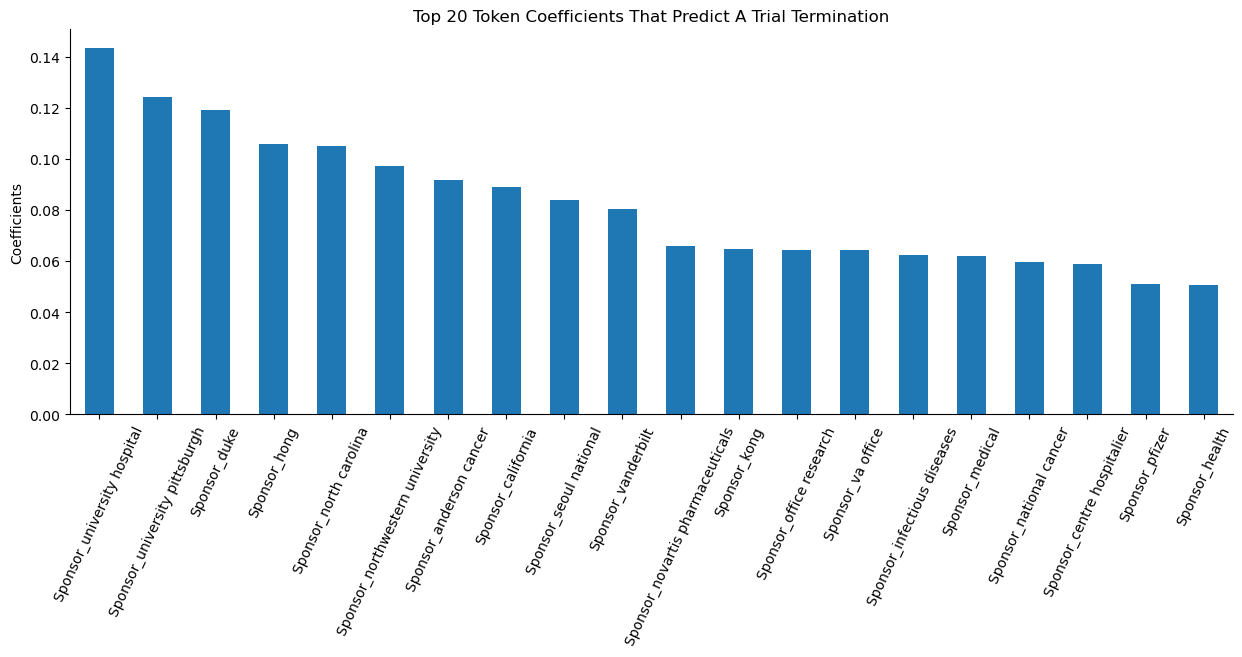

In [29]:
# Creating a dataframe to store the coefficients
top_coef = pd.DataFrame(
    {"coefficients": sponsor_matrix},
    index=sponsor_col_name
).sort_values("coefficients", ascending=False) # ascending = False will give us the top 20 coefficients that predict a positive sentiment

top_coef.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 Token coefficients that predict a trial termination".title())
plt.ylabel("Coefficients")
plt.xticks(rotation=65)
sns.despine()
plt.show()

In [30]:
# MARKDOWN!!!!!

### Collaborators

In [40]:
text_df['Collaborators'].value_counts()

Collaborators
none                                                                       205905
National Cancer Institute (NCI)                                              5922
National Heart, Lung, and Blood Institute (NHLBI)                            1265
National Institute of Mental Health (NIMH)                                   1221
National Institute on Drug Abuse (NIDA)                                      1097
                                                                            ...  
Romeriksprosjektet|Helse Sor-Ost                                                1
Genzyme, a Sanofi Company|National Institutes of Health (NIH)                   1
National Cancer Institute (NCI)|Genentech, Inc.|Aventis Pharmaceuticals         1
University of Hull|Leeds Beckett University|Sheffield Hallam University         1
Swiss Federal Institute of Technology|University of St.Gallen                   1
Name: count, Length: 40932, dtype: int64

**Preprocessing Notes:**
- There are a lot of values in the `Collaborators` column where there are no collaborators. Let's replace the 'none' with an empty string.
- Multiple collaborators are separated by '|', let's only focus on the primary collaborator that appears first.
- Perform CountVectorizer()

In [63]:
# Replace 'none' with empty string
text_df['Collaborators'] = np.where(text_df['Collaborators'] == 'none', '', text_df['Collaborators'])

In [64]:
# slicing primary collaborator
text_df['Collaborators'] = text_df['Collaborators'].str.split('|').str[0]

In [66]:
# sanity check
text_df['Collaborators'].value_counts()

Collaborators
                                                                      205905
National Cancer Institute (NCI)                                         6722
National Heart, Lung, and Blood Institute (NHLBI)                       1589
National Institute of Mental Health (NIMH)                              1433
National Institutes of Health (NIH)                                     1370
                                                                       ...  
University of the West Indies, Mona Campus, Kingston, Jamaica              1
Hospital San Vicente Fundación                                             1
Catalyst Biosciences                                                       1
Planned Parenthood of the Great Northwest and the Hawaiian Islands         1
ICON Bioscience Inc                                                        1
Name: count, Length: 20512, dtype: int64

Alright this looks much better and now we can perform text preprocessing with CountVectorizer()

In [67]:
# Setting variables
X_collab = text_df['Collaborators']
y = text_df['Study Status']

In [69]:
# Splitting summary dataset
collab_train, collab_test, y_train, y_test = train_test_split(X_collab, y, test_size=0.2, random_state=12, stratify=y)

# check the shape
print(collab_train.shape, collab_test.shape, y_train.shape, y_test.shape)

(244088,) (61022,) (244088,) (61022,)


We will instantiate a **CountVectorizer()** with the following features:
- Remove stop_words such as 'the', 'is', 'he', 'them', etc.
- Setting a lower max_feature of 250 since there are less words in collaborators.
- Set ngram_range from 1 to 2 so we can look at words in sequence.

In [73]:
# Instantiate count vectorizer
bow = CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=250)

# Fit the vector
bow.fit(collab_train)

# transform the train and test set
collab_train_transform = bow.transform(collab_train)
collab_test_transform = bow.transform(collab_test)

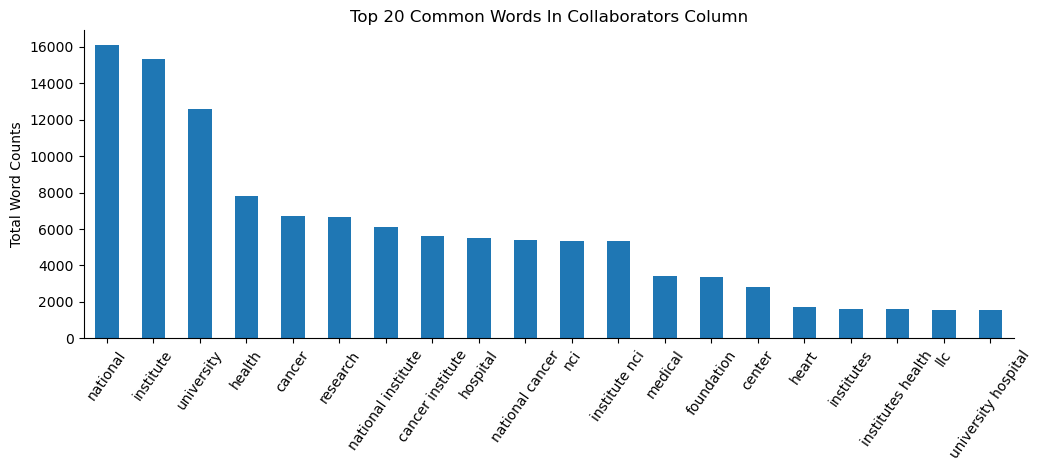

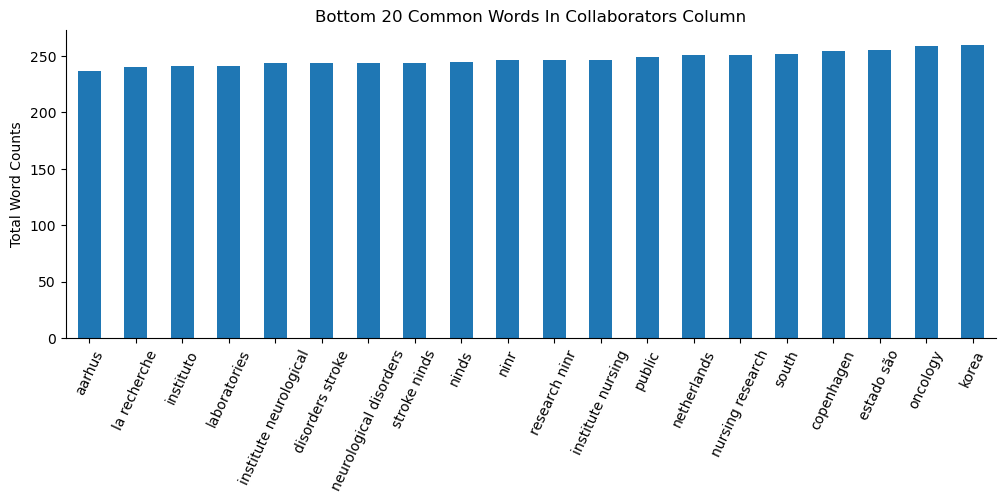

In [74]:
# first plot
top_counts = pd.DataFrame(
    {"counts": collab_train_transform.toarray().sum(axis=0)},
    index=bow.get_feature_names_out()
).sort_values("counts", ascending=False)

top_counts.head(20).plot(kind="bar", legend=False, figsize=(12,4))
plt.title("Top 20 Common Words in Collaborators column".title())
plt.ylabel("Total Word Counts")
plt.xticks(rotation=55)
sns.despine()
plt.show()



# second plot
bottom_counts = pd.DataFrame(
    {"counts": collab_train_transform.toarray().sum(axis=0)},
    index=bow.get_feature_names_out()
).sort_values("counts", ascending=True)

bottom_counts.head(20).plot(kind="bar", legend=False, figsize=(12,4))
plt.title("Bottom 20 common words in Collaborators column".title())
plt.ylabel("Total Word Counts")
plt.xticks(rotation=65)
sns.despine()
plt.show()

Most of the collaborators include the National Institute of Health and Universities. This looks like valuable information for the model. Now let's move onto the baseline.

In [75]:
# Add prefix Collaborator_
collab_col_name = ['Collaborator_' + word for word in bow.get_feature_names_out()]

In [76]:
# convert sparse matrix into dataframe
collab_df = pd.DataFrame.sparse.from_spmatrix(collab_train_transform, columns = collab_col_name).sparse.to_dense()
collab_df.head()

,Collaborator_aarhus,Collaborator_abbott,Collaborator_abuse,Collaborator_abuse alcoholism,Collaborator_abuse nida,Collaborator_ag,Collaborator_agency,Collaborator_aging,Collaborator_aging nia,Collaborator_alcohol,...,Collaborator_therapeutics,Collaborator_trials,Collaborator_trust,Collaborator_united,Collaborator_united states,Collaborator_university,Collaborator_university california,Collaborator_university hospital,Collaborator_university medical,Collaborator_women
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Resetting index
collab_df.reset_index(drop=True, inplace=True)

# Concatenating DataFrames
X_train = pd.concat([X_train, collab_df], axis=1) #axis=1 makes sure it adds by column and not row
X_train.shape

(244088, 1477)

In [78]:
# convert test text to dataframe
collab_test_df = pd.DataFrame.sparse.from_spmatrix(collab_test_transform, columns = collab_col_name).sparse.to_dense()

# Resetting indexes
collab_test_df.reset_index(drop=True, inplace=True)

# Concatenating test dataframes
X_test = pd.concat([X_test, collab_test_df], axis=1) #axis=1 makes sure it adds by column and not row
X_test.shape

(61022, 1477)

**Adding to Baseline Model**

In [79]:
# instantiate the scaler
ss = StandardScaler()

# fit the scaler into the training set
ss.fit(X_train)

# transform the train and testing set
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

In [80]:
# instantiate logistic regression
logreg = LogisticRegression()

# fit the model
logreg.fit(X_train_ss, y_train)

LogisticRegression()

In [81]:
print(f"Train score: {logreg.score(X_train_ss, y_train)}")
print(f"Test score: {logreg.score(X_test_ss, y_test)}")

Train score: 0.9094629805643866
Test score: 0.9080003933007768


In [82]:
# MARKDOWN

In [85]:
# slice out collaborator coeficients
collab_matrix = logreg.coef_[0,1227:]
collab_matrix.shape

(250,)

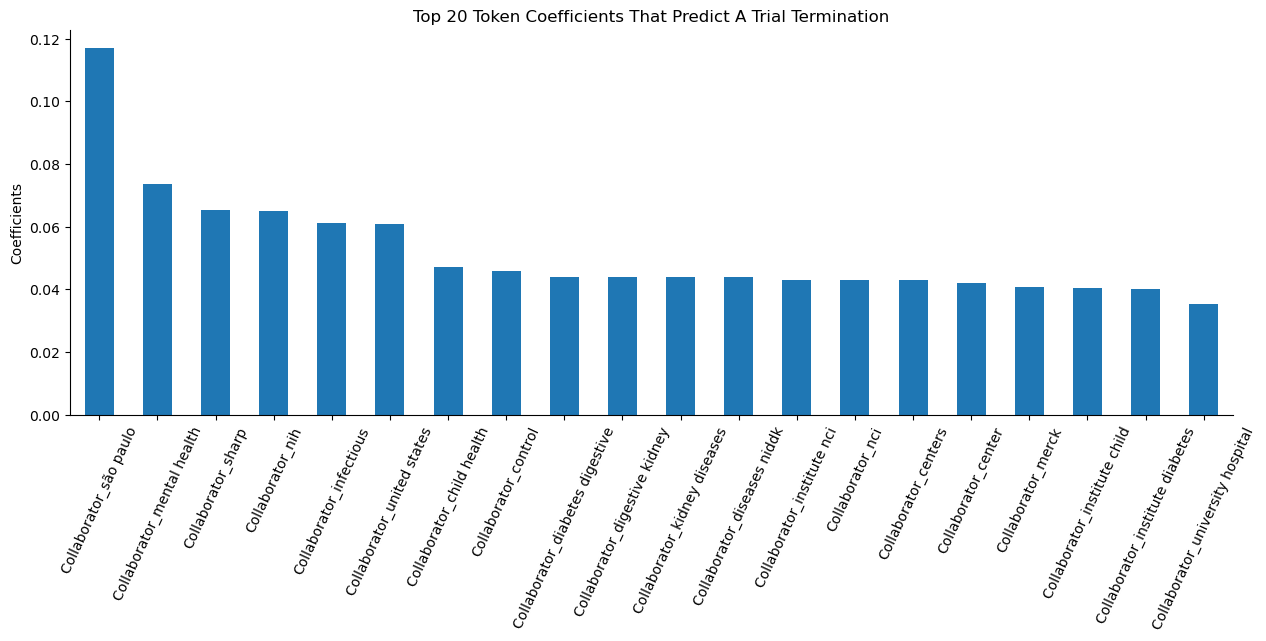

In [86]:
# Creating a dataframe to store the coefficients
top_coef = pd.DataFrame(
    {"coefficients": collab_matrix},
    index=collab_col_name
).sort_values("coefficients", ascending=False) # ascending = False will give us the top 20 coefficients that predict a positive sentiment

top_coef.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 Token coefficients that predict a trial termination".title())
plt.ylabel("Coefficients")
plt.xticks(rotation=65)
sns.despine()
plt.show()

Interesting to see that collaborators in Sao Paulo have the highest coefficient for trial terminations.

### Conditions

In [88]:
text_df['Conditions'].value_counts()

Conditions
Healthy                                                                       7085
Breast Cancer                                                                 2857
Asthma                                                                        1927
HIV Infections                                                                1813
Obesity                                                                       1745
                                                                              ... 
Diabete Type 2|Hyperglycemia                                                     1
Active Non-segmental Vitiligo                                                    1
Leg Cramps, Nocturnal                                                            1
Infertility|Rheumatoid Arthritis                                                 1
Cognition Disorder|Nervous System Diseases|Mental Disorders|Brain Diseases       1
Name: count, Length: 117248, dtype: int64

**Preprocessing Notes:**
- Similar to the Collaborators column, the `Conditions` will need to be preprocessed
- Multiple conditions are separated by '|', let's only focus on the primary condition that appears first.
- Perform CountVectorizer()

In [92]:
# slicing primary condition
text_df['Conditions'] = text_df['Conditions'].str.split('|').str[0]

# sanity check
text_df['Conditions'].value_counts()

Conditions
Healthy                                  7644
Breast Cancer                            3975
Obesity                                  3035
Asthma                                   2405
HIV Infections                           2386
                                         ... 
Difficulty Writing                          1
Pulmonary Embolism (Diagnosis)              1
Allergy to Mold                             1
Agitation in the Elderly                    1
Immune Response to DTP-HB-Hib Vaccine       1
Name: count, Length: 49108, dtype: int64

This looks better, now let's perform the CountVectorizer() to look at more frequent words.

In [94]:
# Setting variables
X_cond = text_df['Conditions']
y = text_df['Study Status']

In [95]:
# Splitting summary dataset
cond_train, cond_test, y_train, y_test = train_test_split(X_cond, y, test_size=0.2, random_state=12, stratify=y)

# check the shape
print(cond_train.shape, cond_test.shape, y_train.shape, y_test.shape)

(244088,) (61022,) (244088,) (61022,)


We will instantiate a **CountVectorizer()** with the following features:
- Remove stop_words such as 'the', 'is', 'he', 'them', etc.
- Setting a higher max_feature of 300 since there are more words in conditions.
- Set ngram_range from 1 to 2 so we can look at words in sequence.

In [96]:
# Instantiate count vectorizer
bow = CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=300)

# Fit the vector
bow.fit(cond_train)

# transform the train and test set
cond_train_transform = bow.transform(cond_train)
cond_test_transform = bow.transform(cond_test)

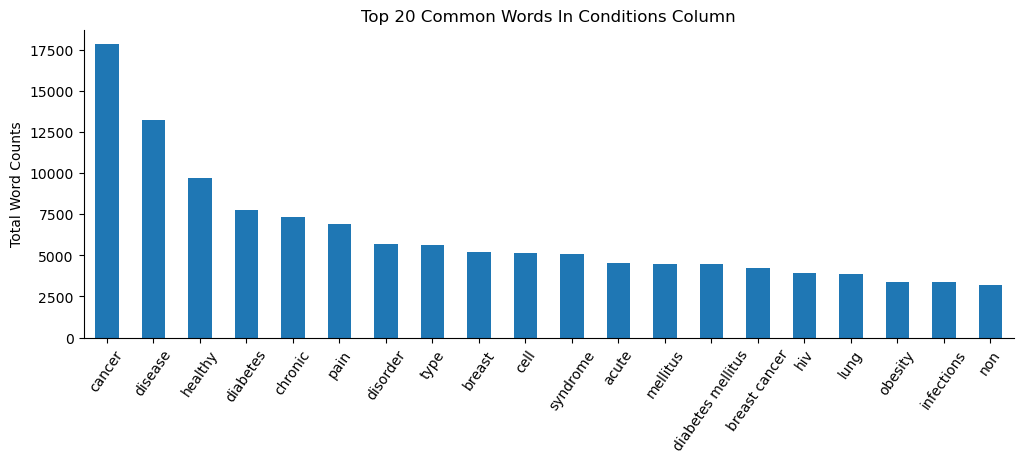

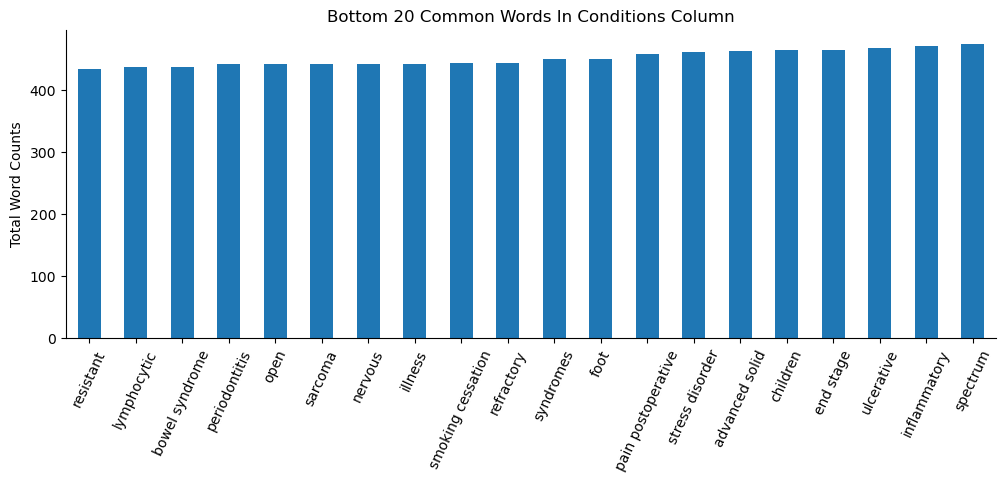

In [97]:
# first plot
top_counts = pd.DataFrame(
    {"counts": cond_train_transform.toarray().sum(axis=0)},
    index=bow.get_feature_names_out()
).sort_values("counts", ascending=False)

top_counts.head(20).plot(kind="bar", legend=False, figsize=(12,4))
plt.title("Top 20 Common Words in Conditions column".title())
plt.ylabel("Total Word Counts")
plt.xticks(rotation=55)
sns.despine()
plt.show()



# second plot
bottom_counts = pd.DataFrame(
    {"counts": cond_train_transform.toarray().sum(axis=0)},
    index=bow.get_feature_names_out()
).sort_values("counts", ascending=True)

bottom_counts.head(20).plot(kind="bar", legend=False, figsize=(12,4))
plt.title("Bottom 20 common words in Conditions column".title())
plt.ylabel("Total Word Counts")
plt.xticks(rotation=65)
sns.despine()
plt.show()

Most conditions in the clinical trial dataset are `cancer` related and then `diabetes` which are pretty important topics to study!

Next we can add these columns to the baseline.

In [98]:
# Add prefix Condition_
cond_col_name = ['Condition_' + word for word in bow.get_feature_names_out()]

In [99]:
# convert sparse matrix into dataframe
cond_df = pd.DataFrame.sparse.from_spmatrix(cond_train_transform, columns = cond_col_name).sparse.to_dense()
cond_df.head()

,Condition_19,Condition_abdominal,Condition_acute,Condition_acute myeloid,Condition_adenocarcinoma,Condition_adult,Condition_advanced,Condition_advanced solid,Condition_age,Condition_age related,...,Condition_type,Condition_type diabetes,Condition_ulcer,Condition_ulcerative,Condition_urinary,Condition_use,Condition_use disorder,Condition_venous,Condition_virus,Condition_volunteers
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
# Resetting index
cond_df.reset_index(drop=True, inplace=True)

# Concatenating DataFrames
X_train = pd.concat([X_train, cond_df], axis=1) #axis=1 makes sure it adds by column and not row
X_train.shape

(244088, 1777)

In [102]:
# convert test text to dataframe
cond_test_df = pd.DataFrame.sparse.from_spmatrix(cond_test_transform, columns = cond_col_name).sparse.to_dense()

# Resetting indexes
cond_test_df.reset_index(drop=True, inplace=True)

# Concatenating test dataframes
X_test = pd.concat([X_test, cond_test_df], axis=1) #axis=1 makes sure it adds by column and not row
X_test.shape

(61022, 2027)

In [87]:
text_df.head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Locations,study_duration
0,Effectiveness of a Problem-solving Interventio...,0,We will conduct a two-arm individually randomi...,0,"Mental Health Issue (E.G., Depression, Psychos...",behavioral: pride 'step 1' problem-solving int...,"Mental health symptoms, The Strengths and Diff...","Mental health symptoms, The adolescent-reporte...",Sangath,Harvard Medical School (HMS and HSDM),ALL,"CHILD, ADULT",NO PHASE,210-490,OTHER,1,Allocation: RANDOMIZED|Intervention Model: PAR...,"Sangath, New Delhi, Delhi, 110016, India",123-244
1,Investigating the Effect of a Prenatal Family ...,0,The purpose of this study is to measure the di...,0,Focus: Contraceptive Counseling|Focus: Postpar...,other: family planning counseling let by commu...,"Self-reported contraceptive use, 6 months post...","Intent to use contraception in the future, 6 m...",Planned Parenthood League of Massachusetts,Society for Family Planning Research Fund,FEMALE,"CHILD, ADULT, OLDER_ADULT",NO PHASE,120-209,OTHER,1,Allocation: NON_RANDOMIZED|Intervention Model:...,Palestinian Ministry of Health Maternal Child ...,366-515
2,Pre-exposure Prophylaxis (PrEP) for People Who...,1,People who inject drugs (PWID) experience high...,0,Intravenous Drug Abuse,behavioral: prep uptake/adherence intervention...,"PrEP uptake by self-report, measured using 1 i...",Participant satisfaction with intervention con...,Boston University,National Institute on Drug Abuse (NIDA),ALL,"ADULT, OLDER_ADULT",NO PHASE,0-8,OTHER,1,Allocation: RANDOMIZED|Intervention Model: PAR...,unknown,245-365
3,Tailored Inhibitory Control Training to Revers...,0,Insufficient inhibitory control is one pathway...,0,Smoking|Alcohol Drinking|Prescription Drug Abu...,behavioral: person-centered inhibitory control...,"Inhibitory control performance, Task 1, Perfor...",Far transfer to a task related to inhibitory c...,University of Oregon,,ALL,ADULT,NO PHASE,80-119,OTHER,1,Allocation: RANDOMIZED|Intervention Model: PAR...,"University of Oregon, Social and Affective Neu...",516-671
4,Neuromodulation of Trauma Memories in PTSD & A...,0,The purpose of this study is to examine the ef...,1,Alcohol Dependence|PTSD,drug: propranolol|drug: placebo,"Retrieval Session Distress Scores (Session 1),...","Proportion of Drinking Days, Proportion of dri...",Medical University of South Carolina,National Institute on Alcohol Abuse and Alcoho...,ALL,"ADULT, OLDER_ADULT",PHASE2,42-59,OTHER,1,Allocation: RANDOMIZED|Intervention Model: PAR...,"MUSC, Charleston, South Carolina, 294258908, U...",862-1097
